In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
reg = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/regression_patterns/NAO/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_DJF_NAO_regression_map_1850-2015.nc')
EOF = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/regression_patterns/NAO/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_DJF_NAO_EOF_pattern_1850-2015.nc')

reg_map = reg['regression_NAO_djf']
eof_map = EOF['EOF_NAO_djf']


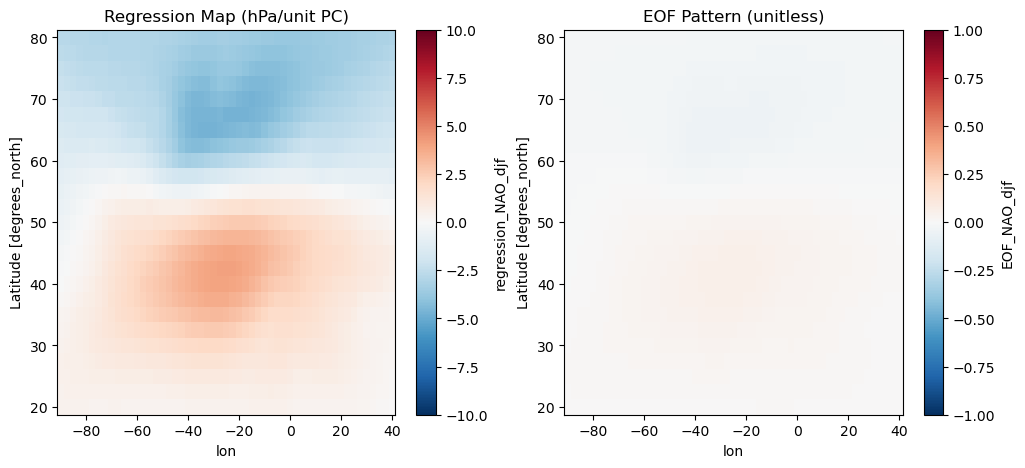

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
reg_map.plot(ax=ax[0], cmap='RdBu_r', vmin=-10, vmax=10)
ax[0].set_title('Regression Map (hPa/unit PC)')

eof_map.plot(ax=ax[1], cmap='RdBu_r', vmin=-1, vmax=1)
ax[1].set_title('EOF Pattern (unitless)')

plt.show()


In [5]:
# Flatten and mask any NaNs
reg_flat = reg_map.values.flatten()
eof_flat = eof_map.values.flatten()

mask = ~np.isnan(reg_flat) & ~np.isnan(eof_flat)
corr = np.corrcoef(reg_flat[mask], eof_flat[mask])[0,1]

print("Spatial correlation between regression map and EOF:", corr)


Spatial correlation between regression map and EOF: 0.9864321462711805


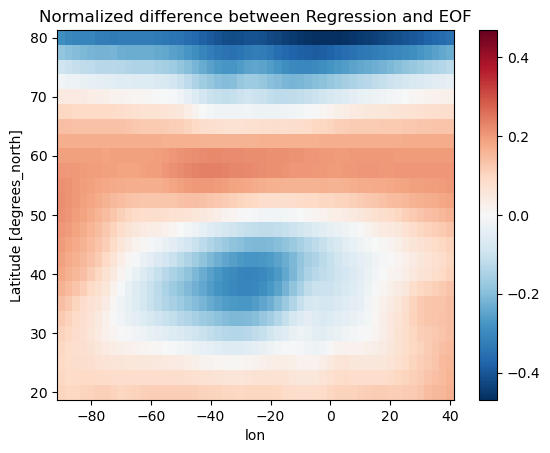

In [6]:
# Normalize both patterns
reg_norm = (reg_map - reg_map.mean()) / reg_map.std()
eof_norm = (eof_map - eof_map.mean()) / eof_map.std()

diff = reg_norm - eof_norm

diff.plot(cmap='RdBu_r')
plt.title("Normalized difference between Regression and EOF")
plt.show()


In [27]:
import importlib
import trend_projection_functions2
importlib.reload(trend_projection_functions2)
from trend_projection_functions2 import project_onto_regression
from trend_projection_functions2 import open_cropNA_unitshPA
import os


home = '/gws/nopw/j04/extant/users/slbennie/'


variable = 'psl'
period = '1850-2015'
modes = ['NAO', 'EA']
seas = 'DJF'

#PROJECTION
print("Calculating the projection of the forced trend onto historical regression map calculated from all ensembles: historical")

regression_NAO = xr.open_dataset(f'{home}regression_patterns/{modes[0]}/historical/HadGEM3-GC31-LL/{variable}_mon_historical_HadGEM3-GC31-LL_{seas}_{modes[0]}_EOF_pattern_{period}.nc')
#regression_EA = xr.open_dataset(f'{home}regression_patterns/{modes[0]}/historical/HadGEM3-GC31-LL/{variable}_mon_historical_HadGEM3-GC31-LL_{seas}_{modes[1]}_EOF_pattern_{period}.nc')

#now setting up the folder path to get the file names for each experiment's model's forced response's trend
folder_path = f'{home}trend_calc_LESFMIP/linear_regression/NAO/historical/HadGEM3-GC31-LL/'
            
#Getting the list of file names within the models folder, should only be one trend per model (working off the ensemble means for each model)
ens_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if 'HadGEM3-GC31-LL' in filename and period in filename]
#print(ens_files[0], len(ens_files), output_file)
            
for i in range(0,len(ens_files)):
    #cropping each trend to just the NA sector and whichever time
    trend = open_cropNA_unitshPA(ens_files[i])#, 1850,2014)
    
    #multiplying the trend by 165 to convert to units of hPa (currently in units of hPa/year, trend calculated between 1850-2015)
    trend = trend * 165
            
    #calling the projection functions
    proj_NAO, residual_NAO = project_onto_regression(trend, regression_NAO['EOF_NAO_djf'], 'slope', 'NAO', 'historical', 'HadGEM3-GC31-LL', period)
#    proj_EA, residual_EA = project_onto_regression(residual_NAO, regression_EA['regression_EA_djf'], 'residual_NAO_djf', 'EA', 'histrocail', 'HadGEM3-GC31-LL', period)

Calculating the projection of the forced trend onto historical regression map calculated from all ensembles: historical
here
doing some calcs


PermissionError: [Errno 13] Permission denied: '/gws/nopw/j04/extant/users/slbennie/projection_indicies/NAtlantic_forced_trends/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_DJF_NAO_projection_1850-2015.nc'

In [28]:
#PROJECTION
print("Calculating the projection of the forced trend onto historical regression map calculated from all ensembles: historical")

regression_NAO = xr.open_dataset(f'{home}regression_patterns/{modes[0]}/historical/HadGEM3-GC31-LL/{variable}_mon_historical_HadGEM3-GC31-LL_{seas}_{modes[0]}_regression_map_{period}.nc')
#regression_EA = xr.open_dataset(f'{home}regression_patterns/{modes[0]}/historical/HadGEM3-GC31-LL/{variable}_mon_historical_HadGEM3-GC31-LL_{seas}_{modes[1]}_EOF_pattern_{period}.nc')

#now setting up the folder path to get the file names for each experiment's model's forced response's trend
folder_path = f'{home}trend_calc_LESFMIP/linear_regression/NAO/historical/HadGEM3-GC31-LL/'
            
#Getting the list of file names within the models folder, should only be one trend per model (working off the ensemble means for each model)
ens_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if 'HadGEM3-GC31-LL' in filename and period in filename]
#print(ens_files[0], len(ens_files), output_file)
            
for i in range(0,len(ens_files)):
    #cropping each trend to just the NA sector and whichever time
    trend = open_cropNA_unitshPA(ens_files[i])#, 1850,2014)
    
    #multiplying the trend by 165 to convert to units of hPa (currently in units of hPa/year, trend calculated between 1850-2015)
    trend = trend * 165
            
    #calling the projection functions
    proj_NAO, residual_NAO = project_onto_regression(trend, regression_NAO['regression_NAO_djf'], 'slope', 'NAO', 'historical', 'HadGEM3-GC31-LL', period)
#    proj_EA, residual_EA = project_onto_regression(residual_NAO, regression_EA['regression_EA_djf'], 'residual_NAO_djf', 'EA', 'histrocail', 'HadGEM3-GC31-LL', period)

Calculating the projection of the forced trend onto historical regression map calculated from all ensembles: historical
here
doing some calcs
here
doing some calcs


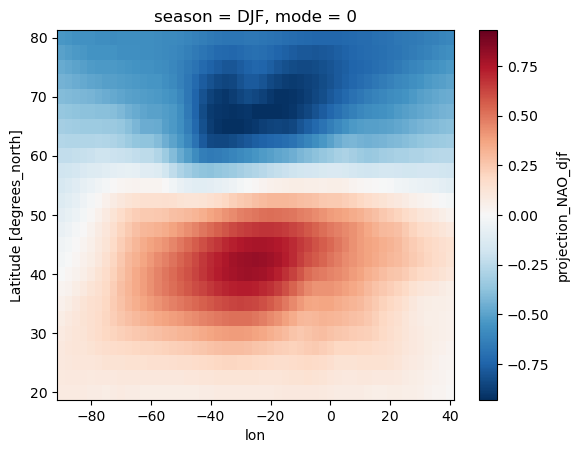

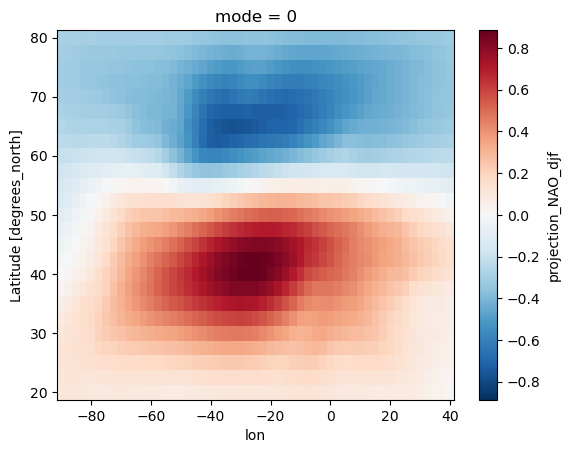

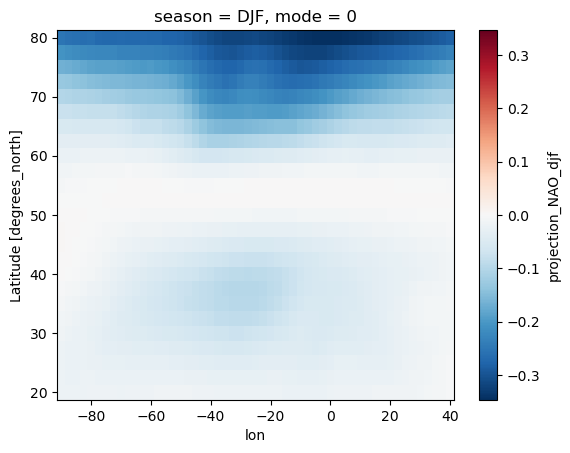

In [7]:
NAO_reg = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/projection_indicies/NAtlantic_forced_trends/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_DJF_NAO_projection_1850-2015.nc')
NAO_EOF = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/projection_indicies/NAtlantic_forced_trends/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_DJF_NAO_projection_1850-2015_EOF.nc')

NAO_reg['projection_NAO_djf'].plot()
plt.show()
NAO_EOF['projection_NAO_djf'].plot()
plt.show()

(NAO_reg['projection_NAO_djf']-NAO_EOF['projection_NAO_djf']).plot()
plt.show()

In [15]:
import numpy as np
import xarray as xr

reg = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/regression_patterns/NAO/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_DJF_NAO_regression_map_1850-2015.nc')
EOF = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/regression_patterns/NAO/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_DJF_NAO_EOF_pattern_1850-2015.nc')


# your loaded DataArrays
reg_da = reg['regression_NAO_djf']  # hPa per PC-unit
eof_da = EOF['EOF_NAO_djf']         # unitless (hopefully)

# Ensure same lat/lon order and mask NaNs
reg_da, eof_da = xr.align(reg_da, eof_da)

lat = eof_da['lat'].values   # NumPy array
lon = eof_da['lon'].values   # NumPy array

coslat = np.cos(np.deg2rad(lat))  # shape (nlat,)
w2d = xr.DataArray(
    coslat[:, None] * np.ones((len(lat), len(lon))),  # shape (nlat, nlon)
    dims=['lat', 'lon'],
    coords={'lat': lat, 'lon': lon}
)

# 1) Spatial correlation (weighted and unweighted)
flat_mask = (~np.isnan(reg_da.values.flatten())) & (~np.isnan(eof_da.values.flatten()))
import scipy.stats as stats
corr_unweighted = np.corrcoef(reg_da.values.flatten()[flat_mask], eof_da.values.flatten()[flat_mask])[0,1]

# weighted correlation: compute weighted covariance/corr
def weighted_corr(a, b, w):
    # w, a, b are 2D DataArrays aligned; mask NaNs
    mask = (~np.isnan(a)) & (~np.isnan(b))
    a = a.where(mask).fillna(0)
    b = b.where(mask).fillna(0)
    w = w.where(mask).fillna(0)
    aw = (a * w).stack(spatial=('lat','lon'))
    bw = (b * w).stack(spatial=('lat','lon'))
    wflat = w.stack(spatial=('lat','lon'))
    a_bar = (aw.sum() / wflat.sum()).item()
    b_bar = (bw.sum() / wflat.sum()).item()
    cov = (((a - a_bar) * (b - b_bar) * w).stack(spatial=('lat','lon'))).sum().item()
    var_a = (((a - a_bar)**2 * w).stack(spatial=('lat','lon'))).sum().item()
    var_b = (((b - b_bar)**2 * w).stack(spatial=('lat','lon'))).sum().item()
    return cov / np.sqrt(var_a * var_b)

corr_weighted = weighted_corr(reg_da, eof_da, w2d)

print("corr unweighted:", corr_unweighted)
print("corr weighted:", corr_weighted)

# 2) Check if reg map is proportional to EOF: compute ratio at valid points
ratio = (reg_da / eof_da).where(~np.isnan(reg_da) & ~np.isnan(eof_da))
print("ratio stats (reg/EOF):", float(ratio.min()), float(ratio.mean()), float(ratio.max()))


corr unweighted: 0.9864321462711805
corr weighted: 0.9889633911644088
ratio stats (reg/EOF): 37.526227319933355 79.59851214429294 138.1574243878662


In [16]:
scale_factor = (reg_da / eof_da).mean().item()
print("Scale factor:", scale_factor)  # should be ~37.53
eof_scaled = eof_da * scale_factor


Scale factor: 79.59851214429294


In [19]:
import xarray as xr
import numpy as np

# --- helper: weighted inner product and norms ---
def weighted_inner(a, b, lat_name='lat', lon_name='lon'):
    """Compute <a,b>_w = sum( cos(lat) * a * b ) over lat,lon (NaN-safe)."""
    # align arrays and broadcast
    a, b = xr.align(a, b)
    lat = a[lat_name]
    lon = a[lon_name]
    coslat = np.cos(np.deg2rad(lat.values))
    w2d = xr.DataArray(coslat[:, None] * np.ones(len(lon)),
                       dims=[lat_name, lon_name], coords={lat_name: lat, lon_name: lon})
    # mask and fill NaNs as zeros (so NaNs in either field zero contribution)
    mask = (~np.isnan(a)) & (~np.isnan(b))
    a2 = a.where(mask).fillna(0)
    b2 = b.where(mask).fillna(0)
    w2 = w2d.where(mask).fillna(0)
    # elementwise product includes weights
    prod = (a2 * b2 * w2).stack(spatial=(lat_name, lon_name))
    return float(prod.sum())

def weighted_norm2(a, lat_name='lat', lon_name='lon'):
    return weighted_inner(a, a, lat_name=lat_name, lon_name=lon_name)

# --- compute optimal scalar to scale EOF -> regression map (weighted LS) ---
# reg_da: regression map (hPa per PC)
# eof_da: EOF pattern (unitless)
# trend_da: trend field you want to project (hPa)

# Ensure variables exist in your workspace; otherwise load them as needed:
# reg_da = reg['regression_NAO_djf']
# eof_da = EOF['EOF_NAO_djf']
# trend_da = your trend DataArray (hPa)

trend_da = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/trend_calc_LESFMIP/linear_regression/NAO/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_DJF_linear_trend_1950-2015_stats.nc')
trend_da = trend_da['slope']
trend_da = trend_da.interp(
    lat=reg_da['lat'],
    lon=reg_da['lon']
)


# Align coords
reg_da, eof_da = xr.align(reg_da, eof_da, join='exact')  # require same grid
# compute scale = <reg, eof>_w / <eof, eof>_w  (weighted least-squares scalar)
num = weighted_inner(reg_da, eof_da)
den = weighted_norm2(eof_da)
scale = num / den
print("Optimal weighted scale (reg ≈ scale * EOF):", scale)

# If correlation is negative you might get negative scale; that's OK.
# But you may prefer to force EOF sign to match regression map for plotting:
if scale < 0:
    print("Scale is negative -> flipping EOF sign for consistent presentation.")
    eof_scaled = eof_da * (-scale)   # flip and positive-scale
    eof_aligned = eof_da * -1.0
    scale_used = -scale
else:
    eof_scaled = eof_da * scale
    eof_aligned = eof_da
    scale_used = scale

# Quick weighted correlations (should be ~1 or -1)
def weighted_corr(a, b, lat_name='lat', lon_name='lon'):
    a, b = xr.align(a, b)
    lat = a[lat_name]
    lon = a[lon_name]
    coslat = np.cos(np.deg2rad(lat.values))
    w2d = xr.DataArray(coslat[:, None] * np.ones(len(lon)),
                       dims=[lat_name, lon_name], coords={lat_name: lat, lon_name: lon})
    mask = (~np.isnan(a)) & (~np.isnan(b))
    a2 = a.where(mask).fillna(0)
    b2 = b.where(mask).fillna(0)
    w = w2d.where(mask).fillna(0)
    # weighted means
    aw = (a2 * w).stack(spatial=('lat','lon'))
    bw = (b2 * w).stack(spatial=('lat','lon'))
    wflat = w.stack(spatial=('lat','lon'))
    a_bar = (aw.sum() / wflat.sum()).item()
    b_bar = (bw.sum() / wflat.sum()).item()
    cov = (((a2 - a_bar) * (b2 - b_bar) * w).stack(spatial=('lat','lon'))).sum().item()
    var_a = (((a2 - a_bar)**2 * w).stack(spatial=('lat','lon'))).sum().item()
    var_b = (((b2 - b_bar)**2 * w).stack(spatial=('lat','lon'))).sum().item()
    return cov / np.sqrt(var_a * var_b)

print("Weighted correlation reg vs eof (raw):", weighted_corr(reg_da, eof_da))

# Check scaled EOF ~ reg
print("Weighted correlation reg vs eof_scaled:", weighted_corr(reg_da, eof_scaled))
# Check mean ratio (diagnostic)
ratio = (reg_da / eof_da).where(~np.isnan(reg_da) & ~np.isnan(eof_da))
print("ratio stats (min, mean, max):", float(ratio.min()), float(ratio.mean()), float(ratio.max()))

# --- projection routine (same weighted inner product) ---
def project(trend, pattern, lat_name='lat', lon_name='lon'):
    # align
    trend, pattern = xr.align(trend, pattern, join='exact')
    num = weighted_inner(trend, pattern, lat_name=lat_name, lon_name=lon_name)
    den = weighted_norm2(pattern, lat_name=lat_name, lon_name=lon_name)
    if den == 0:
        raise ValueError("pattern weighted norm^2 is zero")
    index = num / den
    projection = index * pattern
    residual = trend - projection
    # compute weighted R2
    trend_norm2 = weighted_norm2(trend, lat_name=lat_name, lon_name=lon_name)
    comp_norm2 = weighted_norm2(projection, lat_name=lat_name, lon_name=lon_name)
    r2 = comp_norm2 / trend_norm2 if trend_norm2 != 0 else np.nan
    return index, projection, residual, r2

# Project trend onto regression map
idx_reg, proj_reg, resid_reg, r2_reg = project(trend_da, reg_da)
print("\nProjection onto regression map:")
print(" index (PC-units):", idx_reg)
print(" weighted R2:", r2_reg)

# Project trend onto scaled EOF (should match numerically)
idx_eof, proj_eof, resid_eof, r2_eof = project(trend_da, eof_scaled)
print("\nProjection onto EOF scaled -> reg units:")
print(" index (should be hPa if EOF unitless then scaled makes hPa/PC so index is PC-units):", idx_eof)
print(" weighted R2:", r2_eof)

# Compare projections and indices
diff_proj = (proj_reg - proj_eof).where(~np.isnan(proj_reg) & ~np.isnan(proj_eof))
absdiff_max = float(np.abs(diff_proj).max())
rmse = float(np.sqrt((diff_proj**2).mean()))
rel_err = absdiff_max / (float(np.abs(proj_reg).max()) + 1e-12)

print("\nProjection comparison diagnostics:")
print(" max abs difference (hPa):", absdiff_max)
print(" RMSE (hPa):", rmse)
print(" relative max error:", rel_err)

# Compare indices: if you scaled E


Optimal weighted scale (reg ≈ scale * EOF): 74.99049998669012
Weighted correlation reg vs eof (raw): 0.9889633911644088
Weighted correlation reg vs eof_scaled: 0.9889633911644089
ratio stats (min, mean, max): 37.526227319933355 79.59851214429294 138.1574243878662

Projection onto regression map:
 index (PC-units): 0.06313246433944977
 weighted R2: 0.08116443161412083

Projection onto EOF scaled -> reg units:
 index (should be hPa if EOF unitless then scaled makes hPa/PC so index is PC-units): 0.0428515527543266
 weighted R2: 0.03577684302138118

Projection comparison diagnostics:
 max abs difference (hPa): 0.15052093230190028
 RMSE (hPa): 0.0647689429235003
 relative max error: 0.5028008679223007


In [20]:
import numpy as np
import xarray as xr

# Extract latitudes
lat_eof = eof_da['lat'].values
lat_reg = reg_da['lat'].values

# Compute cosine weights
w_eof = np.cos(np.deg2rad(lat_eof))
w_reg = np.cos(np.deg2rad(lat_reg))

# Check that the latitudes match
print("Latitudes match:", np.allclose(lat_eof, lat_reg))

# Check that the weighting arrays match
print("Weighting arrays match:", np.allclose(w_eof, w_reg))

# Optional: broadcast weights to 2D to match data shape
w2d_eof = xr.DataArray(w_eof[:, None] * np.ones(len(eof_da['lon'])), dims=['lat','lon'])
w2d_reg = xr.DataArray(w_reg[:, None] * np.ones(len(reg_da['lon'])), dims=['lat','lon'])

# Compare full 2D weights
print("Full 2D weighting arrays match:", np.allclose(w2d_eof, w2d_reg))


Latitudes match: True
Weighting arrays match: True
Full 2D weighting arrays match: True


In [21]:
def weighted_corr(x, y, lat_name='lat', lon_name='lon'):
    # Extract latitudes
    lat = x[lat_name].values
    # Cosine latitude weights
    w = np.cos(np.deg2rad(lat))[:, None]  
    # Flatten arrays
    x_flat = x.values.flatten()
    y_flat = y.values.flatten()
    w_flat = np.tile(w.flatten(), int(len(x_flat)/len(w.flatten())))
    
    # Mask NaNs
    mask = (~np.isnan(x_flat)) & (~np.isnan(y_flat))
    x_flat, y_flat, w_flat = x_flat[mask], y_flat[mask], w_flat[mask]
    
    # Weighted covariance / correlation
    cov = np.sum(w_flat * (x_flat - np.average(x_flat, weights=w_flat)) *
                           (y_flat - np.average(y_flat, weights=w_flat)))
    std_x = np.sqrt(np.sum(w_flat * (x_flat - np.average(x_flat, weights=w_flat))**2))
    std_y = np.sqrt(np.sum(w_flat * (y_flat - np.average(y_flat, weights=w_flat))**2))
    
    return cov / (std_x * std_y)

# Test correlation: regression vs EOF weighted
corr_check = weighted_corr(reg_da, eof_da)
print("Weighted correlation check:", corr_check)


Weighted correlation check: 0.9865636944303648


In [23]:
import xarray as xr
import numpy as np

# Assume eof_da and reg_da are your EOF and regression maps (2D: lat × lon)

# 1. Compute latitude weights
lat = eof_da['lat']
lon = eof_da['lon']

# Convert to NumPy array first, then reshape for broadcasting
coslat = np.cos(np.deg2rad(lat.values))  # now it's a 1D NumPy array
w2d = xr.DataArray(
    coslat[:, None] * np.ones(len(lon)),  # shape: (lat, lon)
    dims=['lat', 'lon'],
    coords={'lat': lat, 'lon': lon}
)
# 2. Flatten and mask NaNs consistently
mask = (~np.isnan(eof_da)) & (~np.isnan(reg_da))
eof_flat = eof_da.where(mask)
reg_flat = reg_da.where(mask)
weights_flat = w2d.where(mask)

# 3. Weighted mean subtraction (for correlation)
eof_mean = (eof_flat * weights_flat).sum() / weights_flat.sum()
reg_mean = (reg_flat * weights_flat).sum() / weights_flat.sum()
eof_anom = eof_flat - eof_mean
reg_anom = reg_flat - reg_mean

# 4. Weighted correlation
numerator = (weights_flat * eof_anom * reg_anom).sum()
denominator = np.sqrt((weights_flat * eof_anom**2).sum() * (weights_flat * reg_anom**2).sum())
weighted_corr = numerator / denominator

print("Weighted correlation (xarray-native):", weighted_corr.values)


Weighted correlation (xarray-native): 0.9889633911644088
